In [62]:
from kpfpipe.models.level0 import KPF0
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob

In [68]:
### SANS DARK FRAME SUBTRACTION ###
directory = '/Users/paminabby/Desktop/green/pre-assembly/20220415/*.fits'
kpf_files = glob.glob(directory)
oscan = 100
prescan = 4
for file in kpf_files:
    obj = KPF0()
    obj.header['GREEN_AMP1']['CCDGAIN'] = 5.2
    obj.header['GREEN_AMP2']['CCDGAIN'] = 5.32
    obj.header['GREEN_AMP3']['CCDGAIN'] = 5.3
    obj.header['GREEN_AMP4']['CCDGAIN'] = 5.4
    fits_file = fits.open(file)
    fits_file.info()
    #divide into quads
    div_quad1 = fits_file[0].data[0:2040+oscan,0:2040+prescan+oscan]
    div_quad2 = fits_file[0].data[0:2040+oscan,2040+prescan+oscan:4288]
    div_quad3 = fits_file[0].data[2040+oscan:4280,0:2040+prescan+oscan]
    div_quad4 = fits_file[0].data[2040+oscan:4280,2040+prescan+oscan:4288]
    #populate extensions
    obj['GREEN_AMP1'] = div_quad1
    obj['GREEN_AMP2'] = div_quad2
    obj['GREEN_AMP3'] = div_quad3
    obj['GREEN_AMP4'] = div_quad4
    
    direct,file_name_ext = os.path.split(file)
    file_name,ext = os.path.splitext(file_name_ext)
    output_path = direct + '/' + file_name + ext
    obj.to_fits(file)

Filename: /Users/paminabby/Desktop/green/pre-assembly/20220415/KPF_220415_230300.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (4288, 4280)   int32 (rescales to uint32)   
Filename: /Users/paminabby/Desktop/green/pre-assembly/20220415/KPF_220415_233500.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (4288, 4280)   int32 (rescales to uint32)   
Filename: /Users/paminabby/Desktop/green/pre-assembly/20220415/KPF_220415_234000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (4288, 4280)   int32 (rescales to uint32)   
Filename: /Users/paminabby/Desktop/green/pre-assembly/20220415/KPF_220415_231500.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (4288, 4280)   int32 (rescales to uint32)   
Filename: /Users/paminabby/Desktop/green/pre-assembly/202204

In [84]:
file_name = '/Users/paminabby/Desktop/green/post-assembly/20220413/KP.220413.19160.00_2D.fits'
fitss = fits.open(file_name)
fitss['GREEN_CCD'].data[0:2040+oscan,0:2040+prescan+oscan] = fitss['GREEN_CCD'].data[0:2040+oscan,0:2040+prescan+oscan] * 5.2
fitss['GREEN_CCD'].data[0:2040+oscan,2040+prescan+oscan:4288] = fitss['GREEN_CCD'].data[0:2040+oscan,2040+prescan+oscan:4288] * 5.3
fitss['GREEN_CCD'].data[2040+oscan:4280,0:2040+prescan+oscan] = fitss['GREEN_CCD'].data[2040+oscan:4280,0:2040+prescan+oscan] * 5.3
fitss['GREEN_CCD'].data[2040+oscan:4280,2040+prescan+oscan:4288] = fitss['GREEN_CCD'].data[2040+oscan:4280,2040+prescan+oscan:4288] * 5.4

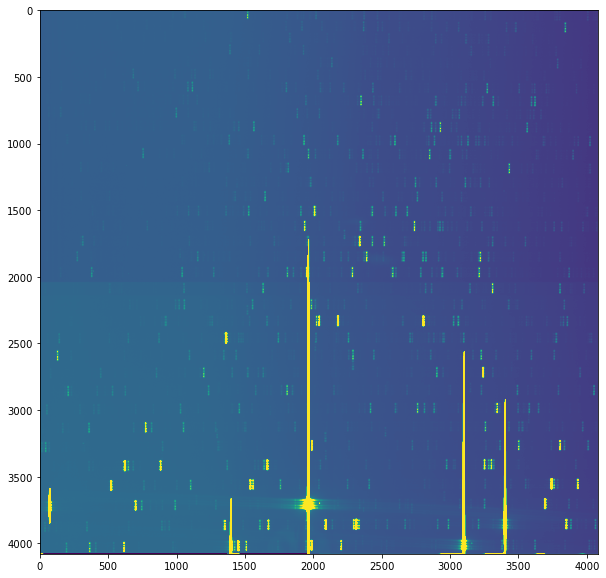

In [85]:
plt.figure(figsize=(10,10))
plt.imshow(fitss['GREEN_CCD'].data,aspect='auto',vmin=0,vmax=2**16)

In [86]:
fitss[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'astropy.fits'       / File Originator                                
INSTRUME= 'KPF     '           / Instrument Name                                
DATALVL = '0       '           / Data Product Base Level                        
DATATMP = 'T/F     '           / Data Temporary Intermediate Product            
OBSERVER= 'Classical Observer Name or Queue' / Observer Name                    
TIMESYS = 'UTC     '           / Time Scale                                     
PROGRAM = 'Keck Prog ID'       / Observing Program ID                           
PINAME  = 'Keck PI '           / Program PI Name                                
OBSTYPE = 'Tst     '        

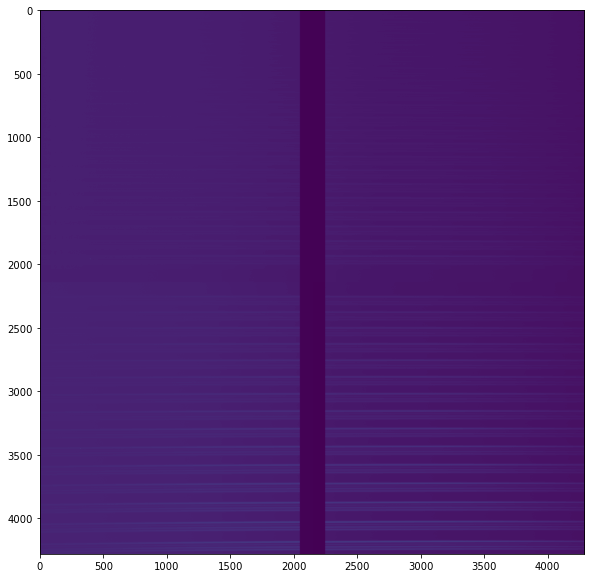

In [19]:
og = fits.open('/Users/paminabby/Desktop/KPF_220413_184900.fits')
plt.figure(figsize=(10,10))
plt.imshow(og[0].data)

In [54]:
# direct = glob.glob('/Users/paminabby/Desktop/green/post-assembly/20220413/*')
# for file in direct:
#     print(file)
#     og = fits.open(file)
#     plt.figure(figsize=(10,10))
#     plt.imshow(og['GREEN_CCD'].data)

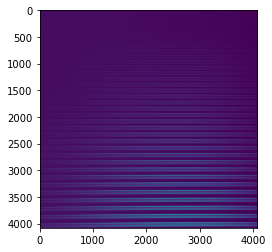

In [51]:
offsets = fits.open('/Users/paminabby/Desktop/green/post-assembly/20220413/KPF_220413_185500.fits')
plt.imshow(offsets['GREEN_CCD'].data)
#KP.+++

In [52]:
np.median(offsets['GREEN_CCD'].data[0:2000,0:2000])

3520.3374755859377

In [53]:
np.median(offsets['GREEN_CCD'].data[2000:4000,2000:4000])

4931.639844003772

In [ ]:
# post_directory = '/Users/paminabby/Desktop/20220411_red/post-assembly/*.fits'
# post_files = glob.glob(post_directory)
# for file_name in post_files:
#     path,fi

In [113]:
# l0 = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/KP.20220412.45046.00.fits')
# plt.figure(figsize=(10,10))
# plt.imshow(l0['RED_CCD'].data)

In [86]:
cheese = '/users/pamina/cute_cheese.fits'
path,file = os.path.split(cheese)
file_name,ext = os.path.splitext(file)
new_file_name = file_name.replace('_cheese','')

In [87]:
new_file_name

'cute'

In [107]:
# tester1 = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/KPF_220411_193700_lev0_preassembly_L0.fits')
# tester2 = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/KPF_220412_003400_lev0_preassembly_L0.fits')
tester3 = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/KP.20220412.45046.00_preassembly_L0.fits')

In [108]:
np.where(tester3['RED_CCD'].data > (2**16))

(array([], dtype=int64), array([], dtype=int64))

In [101]:
newdata = tester3['RED_CCD'].data/4096

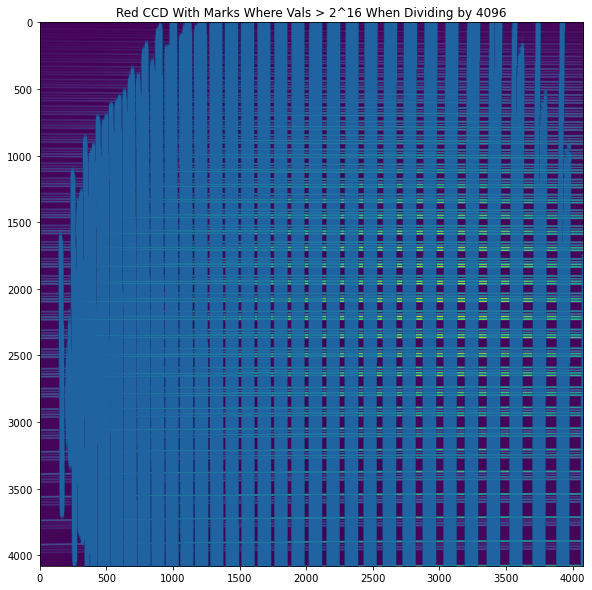

In [100]:
plt.figure(figsize=(10,10))
plt.title('Red CCD With Marks Where Vals > 2^16 When Dividing by 4096')
plt.imshow(tester3['RED_CCD'].data/4096)
plt.scatter(np.where(tester3['RED_CCD'].data/4096>(2**16))[0],np.where(tester3['RED_CCD'].data/4096>(2**16))[1],marker='.',alpha=.05)

(array([[3839.,  191.,   50., ...,    0.,    0.,    0.],
        [3835.,  201.,   44., ...,    0.,    0.,    0.],
        [3839.,  201.,   40., ...,    0.,    0.,    0.],
        ...,
        [3752.,   68.,   77., ...,    0.,    0.,    0.],
        [3754.,   68.,   76., ...,    0.,    0.,    0.],
        [3753.,   68.,   75., ...,    0.,    0.,    0.]]),
 array([ 17082.4230957 ,  28281.9692627 ,  39481.51542969,  50681.06159668,
         61880.60776367,  73080.15393066,  84279.70009766,  95479.24626465,
        106678.79243164, 117878.33859863, 129077.88476562]),
 <a list of 4080 Lists of Patches objects>)

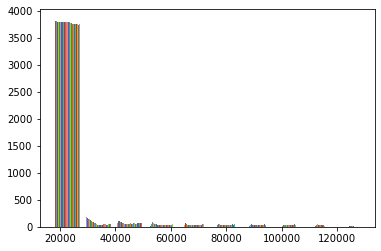

In [67]:
plt.hist(tester1['RED_CCD'].data/4096)

(array([[3839.,  191.,   50., ...,    0.,    0.,    0.],
        [3835.,  201.,   44., ...,    0.,    0.,    0.],
        [3839.,  201.,   40., ...,    0.,    0.,    0.],
        ...,
        [3752.,   68.,   77., ...,    0.,    0.,    0.],
        [3754.,   68.,   76., ...,    0.,    0.,    0.],
        [3753.,   68.,   75., ...,    0.,    0.,    0.]]),
 array([1067.65144348, 1767.62307892, 2467.59471436, 3167.56634979,
        3867.53798523, 4567.50962067, 5267.4812561 , 5967.45289154,
        6667.42452698, 7367.39616241, 8067.36779785]),
 <a list of 4080 Lists of Patches objects>)

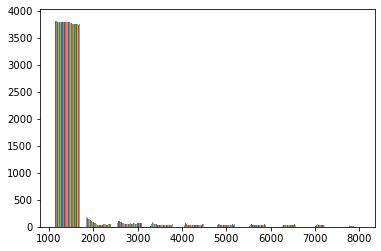

In [68]:
plt.hist(tester1['RED_CCD'].data/2**16)

In [66]:
np.size(np.where(tester1['RED_CCD'].data/4096 > (2**16))[0])

423746

In [56]:
full_size = np.size(tester1['RED_CCD'].data)

In [58]:
tester1['RED_CCD'].data

array([[85197115, 84293948, 87038110, ..., 89585822, 88114727, 87897640],
       [86354551, 86205992, 85185300, ..., 86539972, 86398345, 86434264],
       [83313585, 83547531, 87027082, ..., 87666531, 87223848, 86360379],
       ...,
       [86055542, 85613805, 86762260, ..., 87017787, 88043521, 87255198],
       [85944793, 85311960, 87047561, ..., 87468820, 87201162, 87521753],
       [89684755, 89186460, 91990015, ..., 89119350, 88393413, 87061268]],
      dtype=uint32)

In [57]:
bad_size/full_size

0.05091142829680892

In [46]:
np.median(tester1['RED_CCD'].data/(4096))

20291.461669921875

In [44]:
tester1['RED_AMP1'].data[394,2017]

270347816

In [14]:
cheese = fits.open('/Users/paminabby/Desktop/20220411_red/pre-assembly/KPF_220412_003400_bkgremoved_lev0_preassembly.fits')
cheese.info()

Filename: /Users/paminabby/Desktop/20220411_red/pre-assembly/KPF_220412_003400_bkgremoved_lev0_preassembly.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     113   ()      
  1  RECEIPT       1 BinTableHDU     29   0R x 10C   [D, D, D, D, D, D, D, D, D, D]   
  2  CONFIG        1 BinTableHDU     13   0R x 2C   [D, D]   
  3  GREEN_AMP1    1 ImageHDU        22   (0,)      
  4  GREEN_AMP2    1 ImageHDU        22   (0,)      
  5  GREEN_AMP3    1 ImageHDU        22   (0,)      
  6  GREEN_AMP4    1 ImageHDU        22   (0,)      
  7  GREEN_CCD     1 ImageHDU         8   (0,)      
  8  GREEN_VAR     1 ImageHDU         8   (0,)      
  9  RED_AMP1      1 ImageHDU        23   (2144, 4180)   float32   
 10  RED_AMP2      1 ImageHDU        23   (1944, 4180)   float32   
 11  RED_AMP3      1 ImageHDU        22   (0,)      
 12  RED_AMP4      1 ImageHDU        22   (0,)      
 13  RED_CCD       1 ImageHDU         7   (0,)      
 14  RED_VAR 

In [ ]:
### POST-ASSEMBLY DARK SUBTRACTION ###

In [ ]:
### WITH DARK FRAME SUBTRACTION ###
directory = '/Users/paminabby/Desktop/20220411_red/pre-assembly/*'
file_type = '.fits'
kpf_files = glob.glob(directory+file_type)
oscan = 100
prescan = 4
for file in kpf_files:
    obj = KPF0()
    obj.header['RED_AMP1']['CCDGAIN'] = 5.1
    obj.header['RED_AMP2']['CCDGAIN'] = 5.21
    fits_file = fits.open(file)
    fits_file.info()
    #divide into quads
    div_quad1 = fits_file[0].data[0:4080+oscan,0:2040+prescan+oscan]
    div_quad2 = fits_file[0].data[0:4080+oscan,2040+prescan+oscan:4288]
    
    ###dark frame subtraction###
    texp_dark = 30
    texp = 30
    dark1 = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/KPF_220411_195600_L0.fits')
    dark2 = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/KPF_220411_195300_L0.fits')
    dark3 = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/KPF_220411_195000_L0.fits')
    darks = [dark1['RED_CCD'].data, dark2['RED_CCD'].data, dark3['RED_CCD'].data]
    dark_mean = np.mean(darks,axis=0)
    
    div_quad1 -= div_quad1 - dark_mean.astype(np.float32) * (texp/texp_dark)
    div_quad2 -= dark_mean.astype(np.float32) * (texp/texp_dark)
    
    #populate extensions
    obj['RED_AMP1'] = div_quad1
    obj['RED_AMP2'] = div_quad2
    direct,file_name_ext = os.path.split(file)
    file_name,ext = os.path.splitext(file_name_ext)
    output_path = direct + '/' + file_name+'_lev0_preassembly_darkcorr'+ext
    obj.to_fits(output_path)

In [ ]:
# filee = fits.open('/Users/paminabby/Desktop/kpf_lev0_test/kpf_20220329_045044_20220329045044_2amp_L0_apr11.fits')
# filee.info()

In [ ]:
twoamp = fits.open('/Users/paminabby/Desktop/assembled_2amp_apr11_2.fits')
twoamp.info()

In [ ]:
# plt.figure(figsize=(2.5,5))
# plt.imshow(twoamp['RED_AMP1'].data,aspect='auto')
# plt.figure(figsize=(2.5,5))
# plt.imshow(twoamp['RED_AMP2'].data,aspect='auto')
# plt.figure(figsize=(5,5))
# plt.imshow(twoamp['RED_CCD'].data,aspect='auto')

In [ ]:
### SANS DARK FRAME SUBTRACTION ###
directory = '/Users/paminabby/Desktop/kpf_lev0_test/kpf_20220329_045044_20220329045044.fits'
kpf_files = glob.glob(directory)
oscan = 100
prescan = 4
for file in kpf_files:
    obj = KPF0()
    obj.header['RED_AMP1']['CCDGAIN'] = 5.1
    obj.header['RED_AMP2']['CCDGAIN'] = 5.21
    fits_file = fits.open(file)
    fits_file.info()
    #divide into quads
    div_quad1 = fits_file[0].data[0:4080+oscan,0:2040+prescan+oscan]
    div_quad2 = fits_file[0].data[0:4080+oscan,2040+prescan+oscan:4288]
    #populate extensions
    obj['RED_AMP1'] = div_quad1
    obj['RED_AMP2'] = div_quad2
    #output_path = file.split('.')[0]+'_lev0_preassembly'
    direct,file_name_ext = os.path.split(file)
    file_name,ext = os.path.splitext(file_name_ext)
    output_path = direct + '/' + file_name+'_lev0_preassembly'+ext
    obj.to_fits(output_path)

In [ ]:
fits.open('/Users/paminabby/Desktop/kpf_lev0_test/kpf_20220329_045044_20220329045044_lev0_preassembly.fits').info()

In [ ]:
### WITH DARK FRAME SUBTRACTION ###
directory = '/Users/paminabby/Desktop/20220411_red/pre-assembly/*'
file_type = '.fits'
kpf_files = glob.glob(directory+file_type)
oscan = 100
prescan = 4
for file in kpf_files:
    obj = KPF0()
    obj.header['RED_AMP1']['CCDGAIN'] = 5.1
    obj.header['RED_AMP2']['CCDGAIN'] = 5.21
    fits_file = fits.open(file)
    fits_file.info()
    #divide into quads
    div_quad1 = fits_file[0].data[0:4080+oscan,0:2040+prescan+oscan]
    div_quad2 = fits_file[0].data[0:4080+oscan,2040+prescan+oscan:4288]
    
    ###dark frame subtraction###
    texp_dark = 
    dark1 = 
    dark2 = 
    dark3 = 
    darks = [dark1[0].data, dark2[0].data, dark3[0].data]
    dark_mean = np.mean(darks,axis=0)
    
    div_quad1 -= dark.astype(np.float32) * (texp/texp_dark)
    div_quad2 -= dark.astype(np.float32) * (texp/texp_dark)
    
    #populate extensions
    obj['RED_AMP1'] = div_quad1
    obj['RED_AMP2'] = div_quad2
    output_path = file.split('.')[0]+'_lev0_preassembly'
    print(output_path)
    obj.to_fits(output_path + file_type)

In [ ]:
filee = fits.open('/Users/paminabby/Desktop/20220411_red/post-assembly/KPF_220411_193700_L0.fits')

In [ ]:
filee.info()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(filee[13].data,aspect='auto')

In [ ]:
filee = '/data/kpf/ait/red/20220415/L0/KP.20220415.12340.0_2D.fits'
dire,fnamext = os.path.split(filee)


In [3]:
from astropy.io import fits
ff = fits.open('/Users/paminabby/Desktop/KPF_220415_230000.fits')
ff.info()

Filename: /Users/paminabby/Desktop/KPF_220415_230000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (4288, 4280)   int32 (rescales to uint32)   


In [55]:
filee = fits.open('/Users/paminabby/Desktop/KPF_220415_230000.fits')
obj = KPF0()
#del_exts = ['GREEN_AMP1','GREEN_AMP2','GREEN_AMP3','GREEN_AMP4','GREEN_CCD','GREEN_VAR','RED_AMP1','RED_AMP2','RED_AMP3','RED_AMP4','RED_CCD','RED_VAR','CA_HK','EXPMETER','GUIDECAM','SOLAR_IRRADIANCE']
for ext in del_exts:
    obj.del_extension(ext)
obj.info()
#file.to_fits('/Users/paminabby/Desktop/lev0obj.fits')

Empty KPF0 Data product
|Header Name          |# Cards              
|PRIMARY              |                 108 
|RECEIPT              |                   0 
|CONFIG               |                   0 

|Extension Name       |Data Type            |Data Dimension       
|RECEIPT              |table                |0                   
|CONFIG               |table                |0                   



In [73]:
empty = fits.PrimaryHDU()

In [74]:
fitss = fits.HDUList([empty])

In [84]:
fitss[0].header['']

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [90]:
file = fits.open('/Users/paminabby/Desktop/KPF_220415_230000.fits')
file[0].data = []

In [92]:
file.writeto('/Users/paminabby/Desktop/kpfrawnodata.fits')

In [81]:
neid = fits.open('/Users/paminabby/Desktop/neidL0_20211017T090013.fits')

In [93]:
neid.info()

Filename: /Users/paminabby/Desktop/neidL0_20211017T090013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     341   ()      
  1  AMPLIFIER 01    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  2  AMPLIFIER 02    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  3  AMPLIFIER 03    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  4  AMPLIFIER 04    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  5  AMPLIFIER 05    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  6  AMPLIFIER 06    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  7  AMPLIFIER 07    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  8  AMPLIFIER 08    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  9  AMPLIFIER 09    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
 10  AMPLIFIER 10    1 

In [104]:
neidpri = fits.PrimaryHDU(neid[0].data)
new_neid = fits.HDUList([neidpri])
new_neid.append(fits.ImageHDU([neid[1].data]))

In [121]:
ds.info()

Filename: /Users/paminabby/Desktop/20220415_green/KP2204152310000_2D_ds.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     113   ()      
  1  RECEIPT       1 BinTableHDU     29   2R x 10C   [26A, 6A, 24A, 40A, 3A, 9A, 1A, 21A, 40A, 4A]   
  2  CONFIG        1 BinTableHDU     13   0R x 2C   [D, D]   
  3  GREEN_AMP1    1 ImageHDU        25   (2144, 2140)   uint32   
  4  GREEN_AMP2    1 ImageHDU        25   (2144, 2140)   int32 (rescales to uint32)   
  5  GREEN_AMP3    1 ImageHDU        25   (2144, 2140)   int32 (rescales to uint32)   
  6  GREEN_AMP4    1 ImageHDU        25   (2144, 2140)   int32 (rescales to uint32)   
  7  GREEN_CCD     1 ImageHDU         9   (4080, 4080)   float64   
  8  GREEN_VAR     1 ImageHDU         8   (0,)      
  9  RED_AMP1      1 ImageHDU        22   (0,)      
 10  RED_AMP2      1 ImageHDU        22   (0,)      
 11  RED_AMP3      1 ImageHDU        22   (0,)      
 12  RED_AMP4      1 ImageHDU        2

In [145]:
ds['CONFIG'].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                    0 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
EXTNAME = 'CONFIG  '           / extension name                                 
TTYPE1  = 'number  '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'line    '                                                            
TFORM2  = 'D       '        

In [141]:
ds = fits.open('/Users/paminabby/Desktop/20220415_green/KP2204152310000_2D_ds.fits')
new_ds = fits.HDUList()
prim = fits.PrimaryHDU(ds['PRIMARY'].data)
new_ds.append(prim)

receipt = fits.BinTableHDU(ds['RECEIPT'].data)
new_ds.append(receipt)
new_ds[1].name = 'RECEIPT'

# config = fits.BinTableHDU(ds['CONFIG'].data)
# new_ds.append(config)
# new_ds[2].name = 'CONFIG'

img = fits.ImageHDU(ds['GREEN_AMP1'].data)
new_ds.append(img)
new_ds[2].name = 'AMP1'

img = fits.ImageHDU(ds['GREEN_AMP2'].data)
new_ds.append(img)
new_ds[3].name = 'AMP2'

new_ds[0].header = ds[0].header
new_ds[1].header = ds[1].header
new_ds[2].header = ds[3].header
new_ds[3].header = ds[4].header

In [142]:
new_ds.info()
new_ds.writeto('/Users/paminabby/Desktop/newdss.fits',overwrite=True)

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     113   ()      
  1  RECEIPT       1 BinTableHDU     29   2R x 10C   ['26A', '6A', '24A', '40A', '3A', '9A', '1A', '21A', '40A', '4A']   
  2  GREEN_AMP1    1 ImageHDU        25   (2144, 2140)   uint32   
  3  GREEN_AMP2    1 ImageHDU        25   (2144, 2140)   uint32   


In [108]:
new_neid.writeto('/Users/paminabby/Desktop/neid.fits')

In [109]:
new_neid.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  AMP_01        1 ImageHDU         9   (1250, 5000, 1)   uint16   


In [111]:
neid.info()

Filename: /Users/paminabby/Desktop/neidL0_20211017T090013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     341   ()      
  1  AMPLIFIER 01    1 ImageHDU        25   (1250, 5000)   uint16   
  2  AMPLIFIER 02    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  3  AMPLIFIER 03    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  4  AMPLIFIER 04    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  5  AMPLIFIER 05    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  6  AMPLIFIER 06    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  7  AMPLIFIER 07    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  8  AMPLIFIER 08    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
  9  AMPLIFIER 09    1 ImageHDU        25   (1250, 5000)   int16 (rescales to uint16)   
 10  AMPLIFIER 10    1 ImageHDU        25  

In [79]:
fitss.writeto('/Users/paminabby/Desktop/testtest.fits',overwrite=True)

In [56]:
obj['PRIMARY'].header

AttributeError: 'collections.OrderedDict' object has no attribute 'header'